# PART 1: Source Dataset Analysis (GSM8k)

In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datasets import load_dataset
import Levenshtein

c:\Users\harsh\Desktop\Python\Class_Python\..Projects\GenAIDL\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print("Loading GSM8k Dataset...")
dataset = load_dataset("gsm8k", "main", split="train")

df = pd.DataFrame(dataset)



Loading GSM8k Dataset...


In [3]:
print(df.head())

                                            question  \
0  Natalia sold clips to 48 of her friends in Apr...   
1  Weng earns $12 an hour for babysitting. Yester...   
2  Betty is saving money for a new wallet which c...   
3  Julie is reading a 120-page book. Yesterday, s...   
4  James writes a 3-page letter to 2 different fr...   

                                              answer  
0  Natalia sold 48/2 = <<48/2=24>>24 clips in May...  
1  Weng earns 12/60 = $<<12/60=0.2>>0.2 per minut...  
2  In the beginning, Betty has only 100 / 2 = $<<...  
3  Maila read 12 x 2 = <<12*2=24>>24 pages today....  
4  He writes each friend 3*2=<<3*2=6>>6 pages a w...  


In [4]:
df['question_length'] = df['question'].apply(lambda x: len(x.split()))
df['answer_steps'] = df['answer'].apply(lambda x: len(x.split('\n'))) 
df['answer_length'] = df['answer'].apply(lambda x: len(x.split()))

print(f"Dataset Loaded. Total Samples: {len(df)}")
print(f"Average Question Length: {df['question_length'].mean():.2f} words")
print(f"Average Answer Steps: {df['answer_steps'].mean():.2f} steps")

Dataset Loaded. Total Samples: 7473
Average Question Length: 45.09 words
Average Answer Steps: 4.58 steps


 Visualization 1: Distribution of Problem Complexity

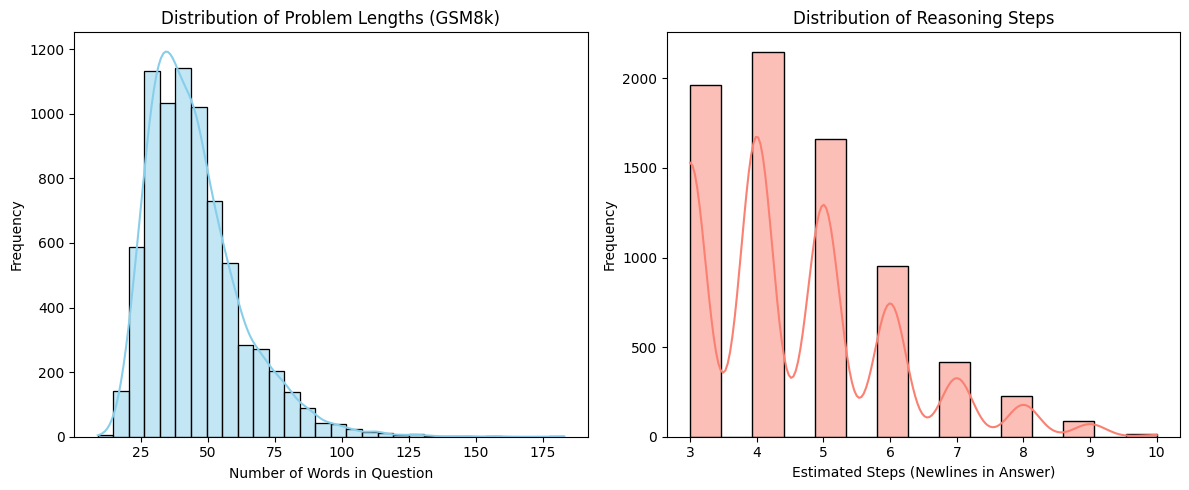

In [5]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['question_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Problem Lengths (GSM8k)')
plt.xlabel('Number of Words in Question')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['answer_steps'], bins=15, kde=True, color='salmon')
plt.title('Distribution of Reasoning Steps')
plt.xlabel('Estimated Steps (Newlines in Answer)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# PART 2: Baseline Stability Analysis (Simulation)

Synthetic Data Generation: Standard Optimizer (High Variance, No Decay)
Simulates a model that keeps making big changes (overshooting)

In [6]:

np.random.seed(42)
n_samples = 50
n_iterations = 6


trajectories = []
for i in range(n_samples):
    # Initial error is high
    current_edit_dist = np.random.randint(40, 60) 
    sample_trajectory = []
    
    for step in range(n_iterations):
        sample_trajectory.append(current_edit_dist)
        
        # Standard Optimizer Behavior:
        # Randomly fluctuates up or down, doesn't converge to 0 effectively
        change = np.random.randint(-15, 10) 
        current_edit_dist = max(5, current_edit_dist + change) # Never truly settles at 0
        
    trajectories.append(sample_trajectory)


In [7]:
# Convert to DataFrame for Plotting
trajectory_df = pd.DataFrame(trajectories, columns=[f"Iter {i}" for i in range(n_iterations)])
trajectory_df['Sample_ID'] = range(n_samples)

# Melt for Seaborn
melted_df = trajectory_df.melt(id_vars="Sample_ID", var_name="Iteration", value_name="Edit_Distance")

# Visualization 2: Stability Analysis (The Zig-Zag)
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

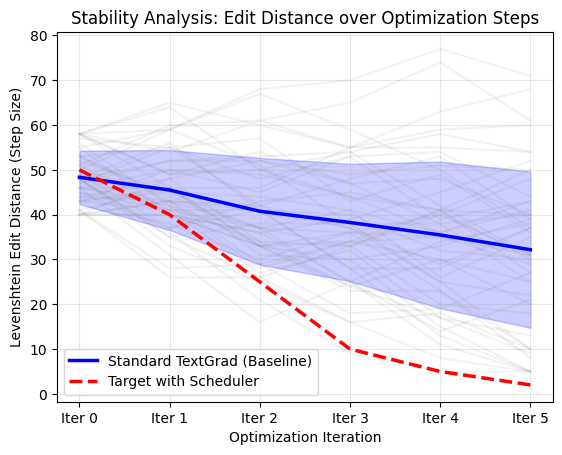


EDA Complete. Figures Generated.


In [ ]:
# Plot individual faint lines for each sample
for i in range(n_samples):
    plt.plot(range(n_iterations), trajectories[i], color='gray', alpha=0.1)

# Plot the Mean Trend with Error Bands
sns.lineplot(data=melted_df, x="Iteration", y="Edit_Distance", 
             errorbar='sd', linewidth=2.5, color='blue', label='Standard TextGrad (Baseline)')

# Plot the "Ideal" Trajectory (Target for Scheduler)
ideal_trajectory = [50, 40, 25, 10, 5, 2] # Smooth exponential decay
plt.plot(range(n_iterations), ideal_trajectory, color='red', linestyle='--', linewidth=2.5, label='Target with Scheduler')

plt.title('Stability Analysis: Edit Distance over Optimization Steps')
plt.xlabel('Optimization Iteration')
plt.ylabel('Levenshtein Edit Distance (Step Size)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
